Datensatz: https://www.kaggle.com/datasets/kandhalkhandeka/satellites-and-debris-in-earths-orbit

### Beschreibung des Datensatzes

1. CCSDS_OMM_VERS: Version des CCSDS-Orbitalparameter-Datensatzes
2. COMMENT: Kommentar
3. CREATION_DATE: Erstellungsdatum des Datensatzes
4. ORIGINATOR: Urheber des Datensatzes
5. OBJECT_NAME: Name des Objekts
6. OBJECT_ID: Objekt-ID
7. CENTER_NAME: Name des Zentrums (in diesem Fall die Erde)
8. REF_FRAME: Referenzrahmen
9. TIME_SYSTEM: Zeitmesssystem
10. MEAN_ELEMENT_THEORY: Mittlere Elementtheorie
11. EPOCH: Zeitpunkt des Epoche
12. MEAN_MOTION: Mittlere Bewegung (Erdumlaufbahnen pro Tag)
13. ECCENTRICITY: Exzentrizität
14. INCLINATION: Neigung
15. RA_OF_ASC_NODE: Aufsteigender Knoten
16. ARG_OF_PERICENTER: Argument des Perizentrums
17. MEAN_ANOMALY: Mittlere Anomalie
18. EPHEMERIS_TYPE: Ephemeris-Typ
19. NORAD_CAT_ID: NORAD Katalog-ID
20. ELEMENT_SET_NO: Elementensatznummer
21. REV_AT_EPOCH: Anzahl der Umläufe an der Epoche
22. BSTAR: B-Star Term
23. MEAN_MOTION_DOT: Änderung der mittleren Bewegung pro Tag
24. MEAN_MOTION_DDOT: Änderung der mittleren Bewegung pro Tag²
25. SEMIMAJOR_AXIS: Halbachse
26. PERIOD: Umlaufzeit
27. APOAPSIS: Apoapsis
28. PERIAPSIS: Periapsis
29. OBJECT_TYPE: Objekttyp
30. RCS_SIZE: RCS-Größe
31. COUNTRY_CODE: Ländercode
32. LAUNCH_DATE: Startdatum
33. SITE: Startplatz
34. DECAY_DATE: Verfallsdatum
35. FILE: Dateiname
36. GP_ID: GP-ID
37. TLE_LINE0: TLE Zeile 0
36. TLE_LINE1: TLE Zeile 1
39. TLE_LINE2: TLE Zeile 2

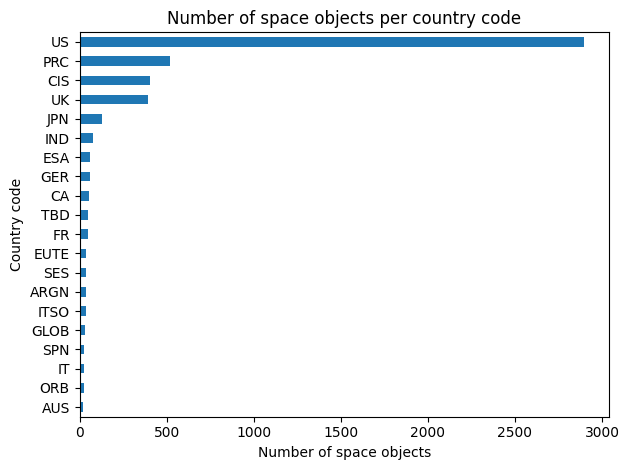

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = pd.read_csv('space_decay.csv')
df_without_duplicates = df.drop_duplicates(subset='OBJECT_NAME')

# plot number of space objects per country_code only for the top 10 countries
# df['COUNTRY_CODE'].value_counts(ascending=True).tail(20).plot(kind='barh')

df_without_duplicates['COUNTRY_CODE'].value_counts(ascending=True).tail(20).plot(kind='barh')
plt.xlabel('Number of space objects')
plt.ylabel('Country code')
plt.title('Number of space objects per country code')
plt.tight_layout()
plt.show()

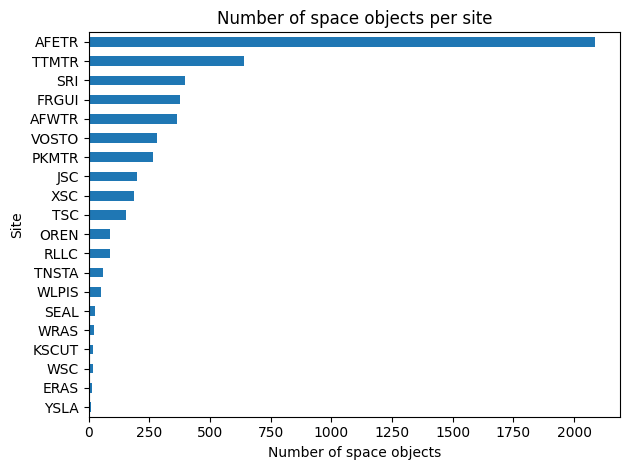

In [3]:
df_without_duplicates['SITE'].value_counts(ascending=True).tail(20).plot(kind='barh')
plt.xlabel('Number of space objects')
plt.ylabel('Site')
plt.title('Number of space objects per site')
plt.tight_layout()
plt.show()

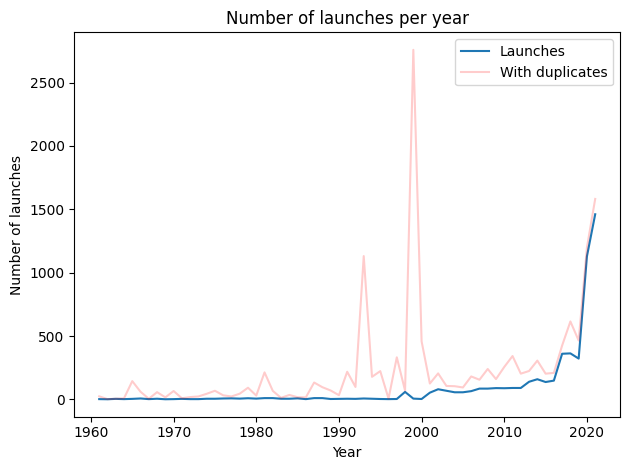

In [4]:
# count number of launches per year and plot
df_without_duplicates['LAUNCH_DATE'].value_counts().sort_index().plot()
df['LAUNCH_DATE'].value_counts().sort_index().plot(color='red', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Number of launches')
plt.title('Number of launches per year')
plt.tight_layout()
plt.legend(['Launches', 'With duplicates'])
plt.show()

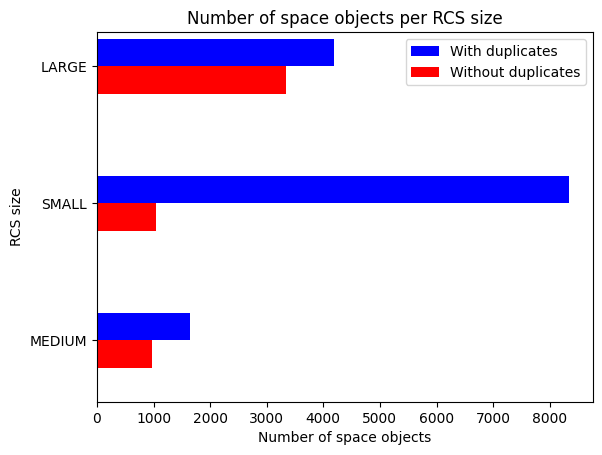

In [5]:
fig, ax = plt.subplots()
df['RCS_SIZE'].value_counts(sort=False).plot(kind='barh', position=0, width=0.2, color='blue', label='With duplicates', ax=ax)
df_without_duplicates['RCS_SIZE'].value_counts(sort=False).plot(kind='barh', position=1, width=0.2, color='red', label='Without duplicates', ax=ax)
plt.xlabel('Number of space objects')
plt.ylabel('RCS size')
plt.title('Number of space objects per RCS size')
plt.legend()
plt.show()

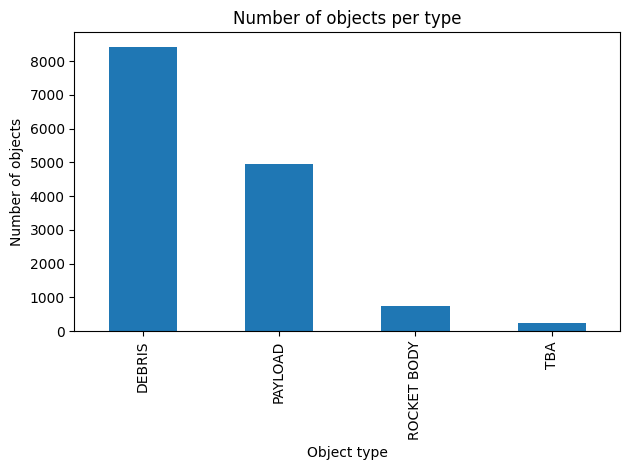

In [7]:
# OBJECT_TYPE show DEBRIS compared to no DEBRIS
df['OBJECT_TYPE'].value_counts().plot(kind='bar')
plt.xlabel('Object type')
plt.ylabel('Number of objects')
plt.title('Number of objects per type')
plt.tight_layout()
plt.show()

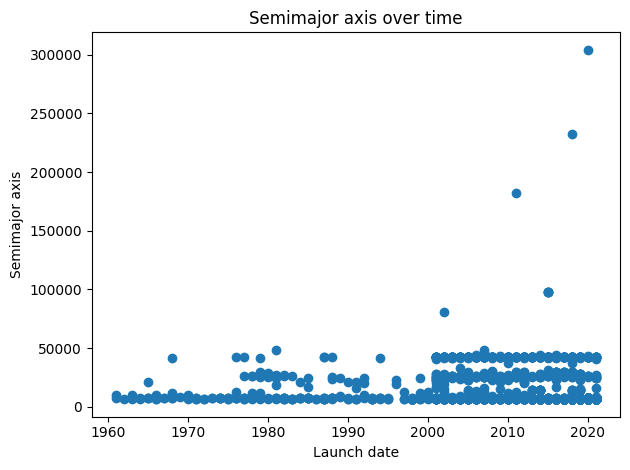

In [98]:
plt.scatter(df_without_duplicates['LAUNCH_DATE'], df_without_duplicates['SEMIMAJOR_AXIS'])
plt.xlabel('Launch date')
plt.ylabel('Semimajor axis')
plt.title('Semimajor axis over time')
plt.tight_layout()
plt.show()

C:\Users\Fabia\AppData\Local\Temp\ipykernel_4812\1597536135.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_without_duplicates['LAUNCH_DATE'] // 10 * 10, y=df_without_duplicates['SEMIMAJOR_AXIS'], palette='pastel')


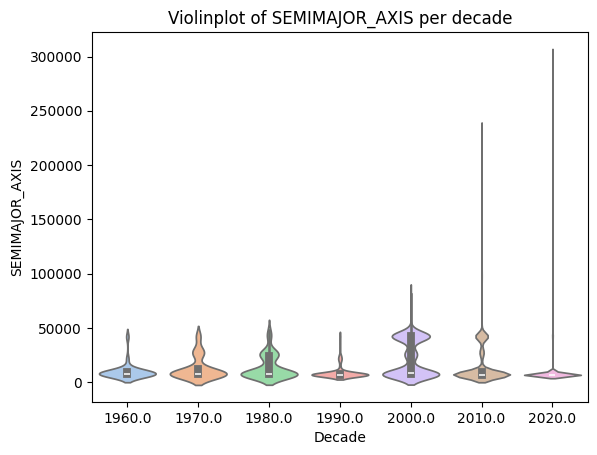

In [39]:
sns.violinplot(x=df_without_duplicates['LAUNCH_DATE'] // 10 * 10, y=df_without_duplicates['SEMIMAJOR_AXIS'], palette='pastel')
plt.title('Violinplot of SEMIMAJOR_AXIS per decade')
plt.xlabel('Decade')
plt.ylabel('SEMIMAJOR_AXIS')
# plt.ylim(0, 100000)
plt.show()


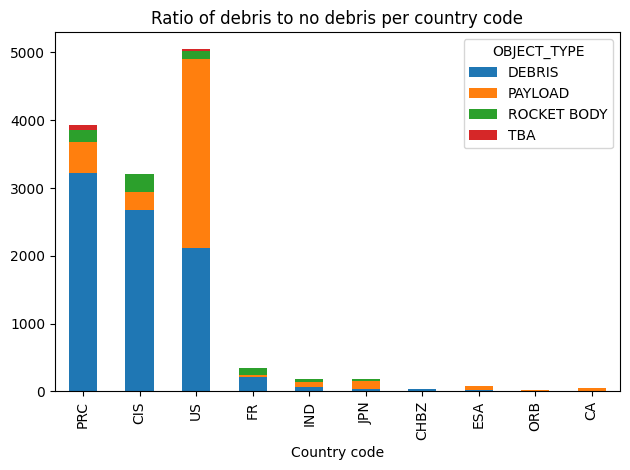

In [9]:
# show ratio of debris to no debris for each COUNTRY_CODE
df.groupby('COUNTRY_CODE')['OBJECT_TYPE'].value_counts().unstack().dropna(axis=1, how="all").sort_values(by=["DEBRIS"], ascending=False).head(10).plot(kind='bar', stacked=True)
# only 20 countries with the most space objects
plt.xlabel('Country code')
# plt.ylabel('Ratio of objects')
plt.title('Ratio of debris to no debris per country code')
plt.tight_layout()
plt.show()

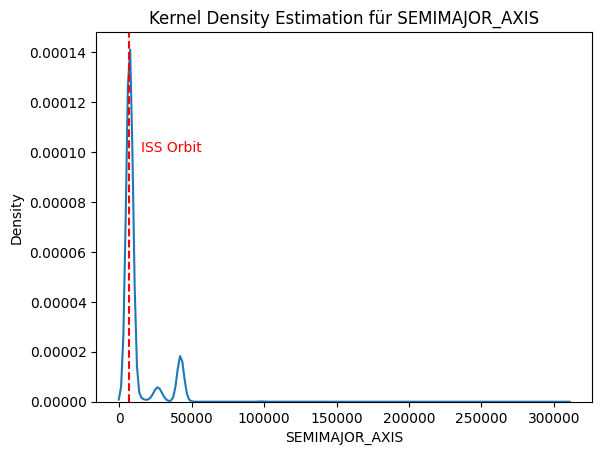

In [51]:
sns.kdeplot(data=df_without_duplicates['SEMIMAJOR_AXIS'])
plt.title('Kernel Density Estimation für SEMIMAJOR_AXIS')
plt.xlabel('SEMIMAJOR_AXIS')
plt.ylabel('Density')
# plt.xlim(0, 50000)
# iss semimajor axis is 6731 km draw a line and describtion
plt.axvline(x=6731, color='red', linestyle='--')
plt.text(15000, 0.0001, 'ISS Orbit', color='red')
plt.show()

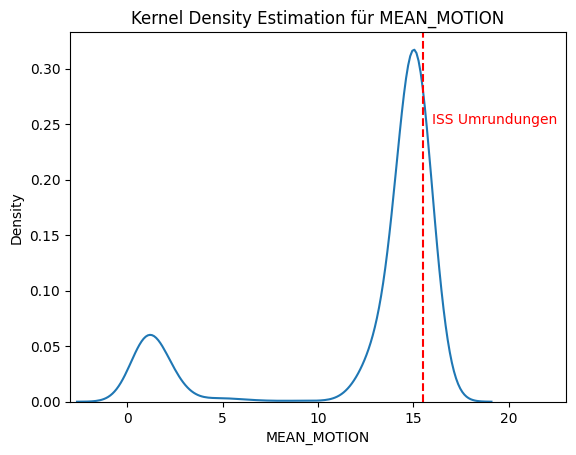

In [125]:
sns.kdeplot(data=df_without_duplicates['MEAN_MOTION'])
plt.title('Kernel Density Estimation für MEAN_MOTION')
plt.xlabel('MEAN_MOTION')
plt.ylabel('Density')
plt.axvline(x=15.5, color='red', linestyle='--')
plt.text(16, 0.25, 'ISS Umrundungen', color='red')
plt.xlim(-3, 23)
plt.show()

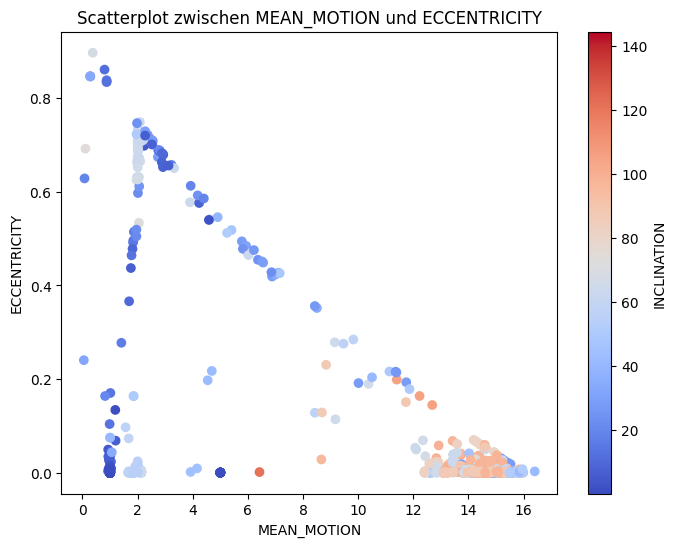

In [13]:
# Scatterplot mit Farbverlauf
plt.figure(figsize=(8, 6))
plt.scatter(df_without_duplicates['MEAN_MOTION'], df_without_duplicates['ECCENTRICITY'], c=df_without_duplicates['INCLINATION'], cmap='coolwarm')
plt.title('Scatterplot zwischen MEAN_MOTION und ECCENTRICITY')
plt.xlabel('MEAN_MOTION')
plt.ylabel('ECCENTRICITY')
plt.colorbar(label='INCLINATION')
plt.show()


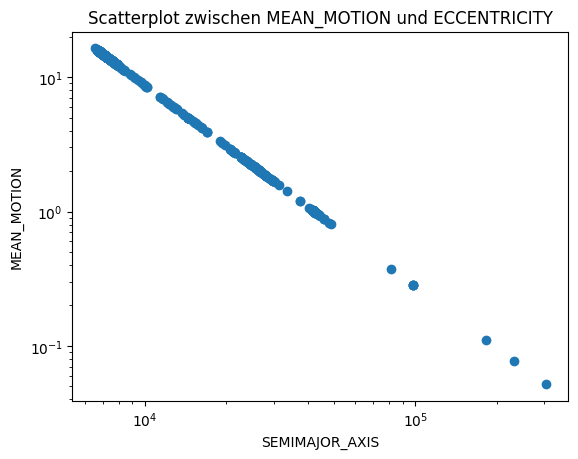

In [119]:
plt.scatter(df_without_duplicates['SEMIMAJOR_AXIS'], df_without_duplicates['MEAN_MOTION'])
plt.title('Scatterplot zwischen MEAN_MOTION und ECCENTRICITY')
plt.xlabel('SEMIMAJOR_AXIS')
plt.ylabel('MEAN_MOTION')
plt.yscale('log')
plt.xscale('log')
plt.show()

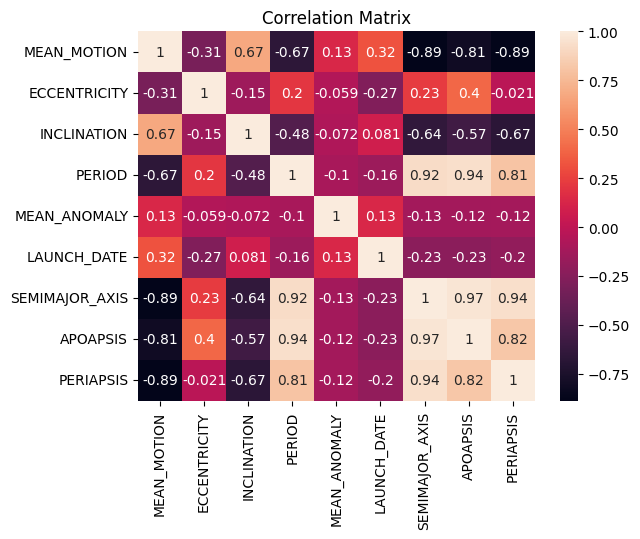

In [15]:
numeric_df = df_without_duplicates.select_dtypes(include='number')
numeric_df = numeric_df[['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'PERIOD', 'MEAN_ANOMALY', 'LAUNCH_DATE', 'SEMIMAJOR_AXIS', 'APOAPSIS', 'PERIAPSIS']]
corr = numeric_df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()